# Stage.3.1 More experiments about numerical weighted OCIL algorithm

##### Timestamp - 2020.11.04

Thanks for the professors suggestion and I try to weighted the numerical attributes to improve the performance of the origin OCIL algorithm. This week I do some more experiments and complete the specific steps in improved parts of the algorithm.Also, I developed the OCIL.py module as the ImprovedOCIL.py module, built the base code of the next experiments.

### The improved details about the weighted numerical attributes


To improve the accuracy about the numerical vectors in origin OCIL algorithm, I think we can try to take all features into consideration and weight all attributes properly. By this idea,the features which have larger varience in the same cluster will be valued and  play a more essential role in clustering algorithm. Define a weights vector ***w*** like the entropy vector in the origin OCIL algorithm and initially set all weights to $1/\sqrt{N}$. N is the numeber of the attributes. And in iterative steps we can recalculate the new weights vector in ***centroid j*** by $w_{j i}=\exp \left(-h \times X_{j i}\right) /\left(\sum_{l=1}^{N}\left(\exp \left(-h \times 2 \times X_{j l}\right)\right)\right)^{1 / 2}
$. The $X_{j i}$ is defined as follow: $X_{j i}=\frac{1}{\left|S_{j}\right|} \sum_{\mathbf{x} \in S_{j}}\left(c_{j i}-x_{i}\right)^{2}
$. $S_{j}$ is a subset which contains all data samples in centroid j, and the $|S_{j}|$ is the cardinality of set $S_{j}$. The ***h*** is constant which is decided in experiment.
<br>
<br>
By using the weight vector, we can compare the distance between the samples and centroid in a new way: $
\begin{array}{l}L_{w}\left(\mathbf{c}_{l}, \mathbf{x}\right)= \left(\sum_{i=1}^{N} w_{l i}\left(c_{l i}-x_{i}\right)^{2}\right)^{1 / 2}\end{array}$. And when we update the cluster subset $S_{j}$, we recalculate the weights again, so the results can meet the convergence quickly.

### The steps of numerical weighted parts in OCIL algorithm

The categorical part will be the same as the origin OCIL algorithm, and we update the numerical part

**Input** Dataset as D, k, and h.
1. Start with k initial centroids c1,c2,...,ck;
2. Set the $w_{j i}=1 / \sqrt{N}$, for each centroid $c_{j}$,j=1,...,k and each features i=1,...N;
3. for each centroid $c_{j}$, find the clusterlabel for each point x by using the origin OCIL similarity metric. But use the new method to calculate the distance: $
\begin{array}{l}L_{w}\left(\mathbf{c}_{l}, \mathbf{x}\right)= \left(\sum_{i=1}^{N} w_{l i}\left(c_{l i}-x_{i}\right)^{2}\right)^{1 / 2}\end{array}$
4. Compute new weights vector, For each centroid $c_{j}$, and for each feature i: $$
\text { Set } X_{j i}=\sum_{\mathbf{x} \in S_{j}}\left(c_{j i}-x_{i}\right)^{2} /\left|S_{j}\right|
$$
$$
\begin{array}{l}
\text { Set } w_{j i}=\exp \left(-h \times X_{j i}\right) /\left(\sum_{l=1}^{N} \exp (-h \times 2 \times\right. 
\left.\left.X_{j l}\right)\right)^{1 / 2}
\end{array}
$$
5. refind the clusterlabel of each point X like step 3;
6. compute new centroids by using the same method in origin OCIL algorithm.
7. Iterate 3,4,5,6 until convergence.

The proof of convergence will be cited later.

### More experiments and results

Last week I used the former datasets which are use in the origin paper,and I testd some new dataset to get the results for verification now. For Table1 the Statistics information of selected mixed data has been shown. The table2 showed the different errors between original OCIL and the numerical weighted OCIL algorithm from which we can observe that, with proper initializations, the numerical weighted OCIL outperforms the original algorithm in terms of clustering accuracy. Additionally, the datasets which have uneven class distributions in numerical attributes will have better performance in accuracies.

<table align="center" style = "width:100%; border:#000 solid;border-collapse:collapse; border-width:2px 0 2px 0px;">
<caption style = "text-align:center">Table1: Statistics of the selected data sets. </caption>
<thead style = "border-bottom:#000 1px solid">
<tr>
<th style = "border:0;text-align:center">Data set</th>
<td style = "border:0;text-align:center">Instance</td>
<td style = "border:0;text-align:center">Attributes(dc+du)</td>
<td style = "border:0;text-align:center">Class</td>
<td style = "border:0;text-align:center">Class Probabilities</td>
</tr>
</thead>
<tr>
<th style = "border:0;text-align:center">Adult</th>
<td style = "border:0;text-align:center">30162</td>
<td style = "border:0;text-align:center">8+6</td>
<td style = "border:0;text-align:center">2</td>
<td style = "border:0;text-align:center">75.11% 24.89%</td>
</tr>
<tr>
<th style = "border:0;text-align:center">Blood transfusion</th>
<td style = "border:0;text-align:center">748</td>
<td style = "border:0;text-align:center">1+5</td>
<td style = "border:0;text-align:center">2</td>
<td style = "border:0;text-align:center">24.00% 76.00%</td>
</tr>
<tr>
<th style = "border:0;text-align:center">Credit</th>
<td style = "border:0;text-align:center">653</td>
<td style = "border:0;text-align:center">9+6</td>
<td style = "border:0;text-align:center">2</td>
<td style = "border:0;text-align:center">54.67% 45.33%</td>
</tr>
<tr>
<th style = "border:0;text-align:center">Statlog</th>
<td style = "border:0;text-align:center">270</td>
<td style = "border:0;text-align:center">7+6</td>
<td style = "border:0;text-align:center">2</td>
<td style = "border:0;text-align:center">55.56% 44.44%</td>
</tr>
<tr>
<th style = "border:0;text-align:center">German</th>
<td style = "border:0;text-align:center">1000</td>
<td style = "border:0;text-align:center">13+7</td>
<td style = "border:0;text-align:center">2</td>
<td style = "border:0;text-align:center">70.00% 30.00%</td>
</tr>
</table>
    

<table align="center" style = "width:100%; border:#000 solid;border-collapse:collapse; border-width:2px 0 2px 0px;">
<caption style = "text-align:center">Table2: Clustering errors of original OCIL on mixed data sets in comparison with the numerical weighted OCIL </caption>
<thead style = "border-bottom:#000 1px solid">
<tr>
<th style = "border:0;text-align:center">Data set</th>
<td style = "border:0;text-align:center">original OCIL</td>
<td style = "border:0;text-align:center">Numerical weighted</td>
<td style = "border:0;text-align:center">h value</td>
</tr>
</thead>
<tr>
<th style = "border:0;text-align:center">Adult</th>
<td style = "border:0;text-align:center">0.285061</td>
<td style = "border:0;text-align:center"><strong>0.244049</strong></td>
<td style = "border:0;text-align:center">12</td>

</tr>
<tr>
<th style = "border:0;text-align:center">Blood transfusion</th>
<td style = "border:0;text-align:center">0.326640</td>
<td style = "border:0;text-align:center"><strong>0.281124</strong></td>
<td style = "border:0;text-align:center">9</td>
</tr>
<tr>
<th style = "border:0;text-align:center">Credit</th>
<td style = "border:0;text-align:center">0.245023</td>
<td style = "border:0;text-align:center"><strong>0.231240</strong></td>
<td style = "border:0;text-align:center">9</td>
</tr>
<tr>
<th style = "border:0;text-align:center">Statlog</th>
<td style = "border:0;text-align:center">0.229630</td>
<td style = "border:0;text-align:center"><strong>0.170370</strong></td>
<td style = "border:0;text-align:center">9</td>
</tr>
<tr>
<th style = "border:0;text-align:center">German</th>
<td style = "border:0;text-align:center">0.319000</td>
<td style = "border:0;text-align:center"><strong>0.293000</strong></td>
<td style = "border:0;text-align:center">22</td>
</tr>
</table>
    

#### the raw results and python instance of the experiment

#### the "adult" dataset

The errors of origin algorithm is 0.285061, the improved is 0.244049


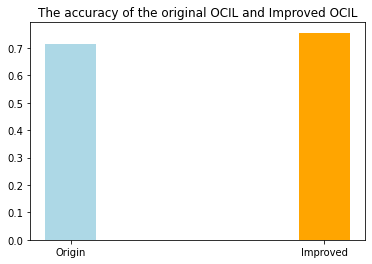

In [1]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing

df_adult = pd.read_table("./adults/adult.data", sep=',')
df_adult = df_adult.dropna()

targetLabel = df_adult["classification"].values
targetLabel = targetLabel.tolist()
dataC = df_adult[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]].values
preDataN = df_adult[["fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]].values
#for i in range(preDataN.shape[1]):
    #if i == 0:
        #dataN = Tools.myMinMaxScale(preDataN[:,i]).reshape(1,preDataN.shape[0])
    #else:
        #dataN = np.row_stack((dataN,Tools.myMinMaxScale(preDataN[:,i])))
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(preprocessing.scale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.barFigure(dataC, dataN, clusterC, clusterN, 20, targetLabel, 0.1,12, 2)


#### the "Blood Transfusion" dataset

The errors of origin algorithm is 0.326640, the improved is 0.281124


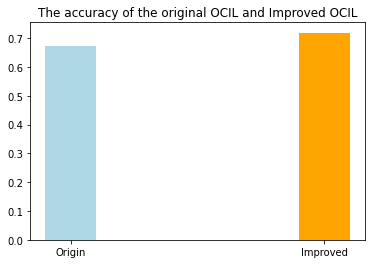

In [4]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing

df_trans = pd.read_table("./transfusion/transfusion.data",sep=",")
preDataN = df_trans[["Recency(months)","Frequency(times)","Monetary(c.c.blood)","Time(months)"]].values
dataC = df_trans["Whether he/she donated blood in March 2007"].values
dataC = dataC.reshape(preDataN.shape[0],1)
targetLabel = df_trans["Whether he/she donated blood in March 2007"].values
targetLabel = targetLabel.tolist()
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(preprocessing.scale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.barFigure(dataC, dataN, clusterC, clusterN, 20, targetLabel, 0.05,9, 2)

The errors of origin algorithm is 0.245023, the improved is 0.231240


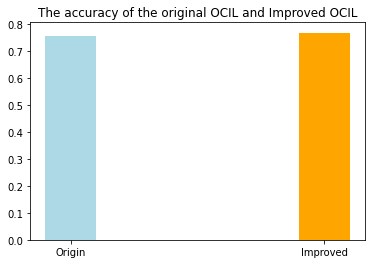

In [9]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing

df_crx = pd.read_table("./Credit_card_data/crx.data", sep = ",")
df_crx = df_crx.dropna()#delete the rows with missing value
targetLabel = []
for i in range(len(df_crx["A16"].values)):
    if df_crx["A16"].values[i] == "+":
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_crx[["A2","A3","A8","A11","A14","A15"]].values
dataC = df_crx[["A1","A4","A5","A6","A7","A9","A10","A12","A13"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(preprocessing.scale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.barFigure(dataC, dataN, clusterC, clusterN, 20, targetLabel, 0.6, 9, 2)

The errors of origin algorithm is 0.229630, the improved is 0.170370


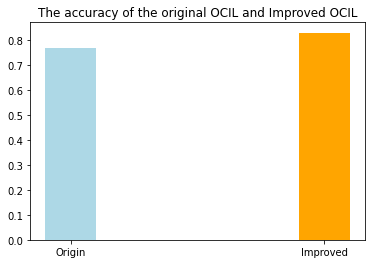

In [20]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing

df_Statlog = pd.read_table("./Statlog_heart_data/heart.dat", sep = " ")
targetLabel = []
for i in range(len(df_Statlog["Classification"].values)):
    if df_Statlog["Classification"].values[i] == 1:
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_Statlog[["A1","A4","A5","A8","A10","A12","A11"]].values
dataC = df_Statlog[["A2","A3","A6","A7","A9","A13"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(Tools.myMinMaxScale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(Tools.myMinMaxScale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.barFigure(dataC, dataN, clusterC, clusterN, 20, targetLabel, 0.05, 9, 2)

The errors of origin algorithm is 0.319000, the improved is 0.293000


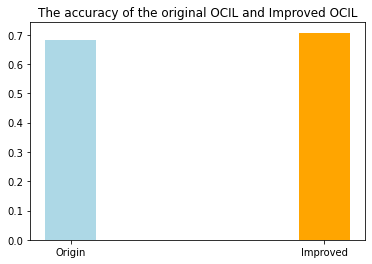

In [4]:
import ImpOCIL 
import myPersonalTools as Tools
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing

df_GerCre = pd.read_table("./German_credit/german.data", sep = " ")
targetLabel = []
for i in range(len(df_GerCre["Classification"].values)):
    if df_GerCre["Classification"].values[i] == 1:
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_GerCre[["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]].values
dataC = df_GerCre[["Attribute1","Attribute3","Attribute4","Attribute6","Attribute7","Attribute9","Attribute10","Attribute12","Attribute14","Attribute15","Attribute17","Attribute19","Attribute20"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.array(preprocessing.scale(preDataN[:,i])).reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.array(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = ImpOCIL.clusterUpdate(dataC, dataN, targetLabel)
ImpOCIL.barFigure(dataC, dataN, clusterC, clusterN, 20, targetLabel, 0.92,22, 2)

### Next research plan

+ develop the initialization of the original OCIL
+ do some research about whether the half-supervised mechanism can be applied